### **spacy_text_classification : Exercise**


- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.

In [1]:
#uncomment the below line and run this cell to install the large english model which is trained on wikipedia data

# !python -m spacy download en_core_web_lg

In [1]:
#import spacy and load the language model downloaded
import spacy
nlp = spacy.load('en_core_web_lg')


### **About Data: News Category Classifier**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under **Multi-class** classification Problem.

In [3]:
#import pandas library
import pandas as pd


#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json('News_Category_Dataset.json', lines=True)


#print the shape of data
print(df.shape)

#print the top5 rows
print(df.head())


(124989, 6)
                                   short_description  \
0  She left her husband. He killed their children...   
1                           Of course it has a song.   
2  The actor and his longtime girlfriend Anna Ebe...   
3  The actor gives Dems an ass-kicking for not fi...   
4  The "Dietland" actress said using the bags is ...   

                                            headline       date  \
0  There Were 2 Mass Shootings In Texas Last Week... 2018-05-26   
1  Will Smith Joins Diplo And Nicky Jam For The 2... 2018-05-26   
2    Hugh Grant Marries For The First Time At Age 57 2018-05-26   
3  Jim Carrey Blasts 'Castrato' Adam Schiff And D... 2018-05-26   
4  Julianna Margulies Uses Donald Trump Poop Bags... 2018-05-26   

                                                link          authors  \
0  https://www.huffingtonpost.com/entry/texas-ama...  Melissa Jeltsen   
1  https://www.huffingtonpost.com/entry/will-smit...    Andy McDonald   
2  https://www.huffingtonpost

In [6]:
#check the distribution of labels 
df.category.value_counts()


POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [12]:
filtered_df = df[df['category'].isin(['BUSINESS', 'SPORTS', 'CRIME'])]
filtered_df.shape

(11314, 6)

In [13]:
new_df = filtered_df.loc[:, ['headline', 'category']]
new_df.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME
40,"Man Faces Charges After Pulling Knife, Stun Gu...",CRIME
42,2 People Injured In Indiana School Shooting,CRIME
80,Jets Chairman Christopher Johnson Won't Fine P...,SPORTS


In [17]:
#Add the new column "label_num" which gives a unique number to each of these labels 

new_df['category_num'] = new_df['category'].map({'CRIME': 0, 'SPORTS': 1, 'BUSINESS': 2})

#check the results with top 5 rows
new_df.head()

,headline,category,category_num
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,0
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME,0
40,"Man Faces Charges After Pulling Knife, Stun Gu...",CRIME,0
42,2 People Injured In Indiana School Shooting,CRIME,0
80,Jets Chairman Christopher Johnson Won't Fine P...,SPORTS,1


### **Preprocess the text**

In [20]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [21]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
new_df['preprocessed_headline'] = new_df['headline'].apply(preprocess)


In [22]:
#print the top 5 rows
new_df.head()

,headline,category,category_num,preprocessed_headline
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,0,2 mass shooting Texas week 1 tv
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME,0,Rachel Dolezal face felony charge Welfare Fraud
40,"Man Faces Charges After Pulling Knife, Stun Gu...",CRIME,0,Man face charge Pulling Knife Stun Gun muslim ...
42,2 People Injured In Indiana School Shooting,CRIME,0,2 People injure Indiana School shooting
80,Jets Chairman Christopher Johnson Won't Fine P...,SPORTS,1,Jets Chairman Christopher Johnson will Fine Pl...


### **Get the spacy embeddings for each preprocessed text**

In [23]:
#create a new column "vector" that store the vector representation of each pre-processed text

new_df['vector'] = new_df['preprocessed_headline'].apply(lambda text: nlp(text).vector)

In [24]:
#print the top 5 rows
new_df.head()

,headline,category,category_num,preprocessed_headline,vector
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,0,2 mass shooting Texas week 1 tv,"[0.02735424, -3.2363713, -2.1377144, 3.1737943..."
32,Rachel Dolezal Faces Felony Charges For Welfar...,CRIME,0,Rachel Dolezal face felony charge Welfare Fraud,"[-1.5109063, -0.49405292, -1.3542942, 0.11346,..."
40,"Man Faces Charges After Pulling Knife, Stun Gu...",CRIME,0,Man face charge Pulling Knife Stun Gun muslim ...,"[-0.317656, 0.3676869, -0.8042759, 1.736512, 1..."
42,2 People Injured In Indiana School Shooting,CRIME,0,2 People injure Indiana School shooting,"[-2.2128751, -2.0978065, -0.38063, 3.5997903, ..."
80,Jets Chairman Christopher Johnson Won't Fine P...,SPORTS,1,Jets Chairman Christopher Johnson will Fine Pl...,"[0.08743114, 0.6048534, -1.1495833, 1.0816966,..."


**Train-Test splitting**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    new_df.vector.values,
    new_df.category_num,
    test_size=0.2,
    random_state=2023
)


**Reshape the X_train and X_test so as to fit for models**

In [26]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

**Attempt 1:**


- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()
clf.fit(scaled_train_embed, y_train)

#2. fit with all_train_embeddings and y_train


DecisionTreeClassifier()

In [33]:
#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       625
           1       0.67      0.69      0.68       800
           2       0.70      0.68      0.69       838

    accuracy                           0.68      2263
   macro avg       0.68      0.68      0.68      2263
weighted avg       0.68      0.68      0.68      2263



**Attempt 2:**


- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)


MultinomialNB()

In [35]:
y_pred = clf.predict(scaled_test_embed)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.41      0.58       625
           1       0.66      0.84      0.74       800
           2       0.72      0.83      0.77       838

    accuracy                           0.72      2263
   macro avg       0.78      0.70      0.70      2263
weighted avg       0.76      0.72      0.71      2263



**Attempt 3:**


- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [36]:
from  sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(scaled_train_embed, y_train)

KNeighborsClassifier()

In [37]:
y_pred = clf.predict(scaled_test_embed)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       625
           1       0.80      0.83      0.81       800
           2       0.89      0.74      0.81       838

    accuracy                           0.81      2263
   macro avg       0.81      0.81      0.81      2263
weighted avg       0.82      0.81      0.81      2263



**Attempt 4:**


- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(scaled_train_embed, y_train)

RandomForestClassifier()

In [39]:
y_pred = clf.predict(scaled_test_embed)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       625
           1       0.84      0.83      0.83       800
           2       0.82      0.87      0.84       838

    accuracy                           0.84      2263
   macro avg       0.84      0.84      0.84      2263
weighted avg       0.84      0.84      0.84      2263



**Attempt 5:**


- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()
clf.fit(scaled_train_embed, y_train)

GradientBoostingClassifier()

In [41]:
y_pred = clf.predict(scaled_test_embed)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       625
           1       0.87      0.85      0.86       800
           2       0.86      0.89      0.87       838

    accuracy                           0.86      2263
   macro avg       0.86      0.86      0.86      2263
weighted avg       0.86      0.86      0.86      2263



**Print the confusion Matrix with the best model got**

Text(95.72222222222221, 0.5, 'Truth')

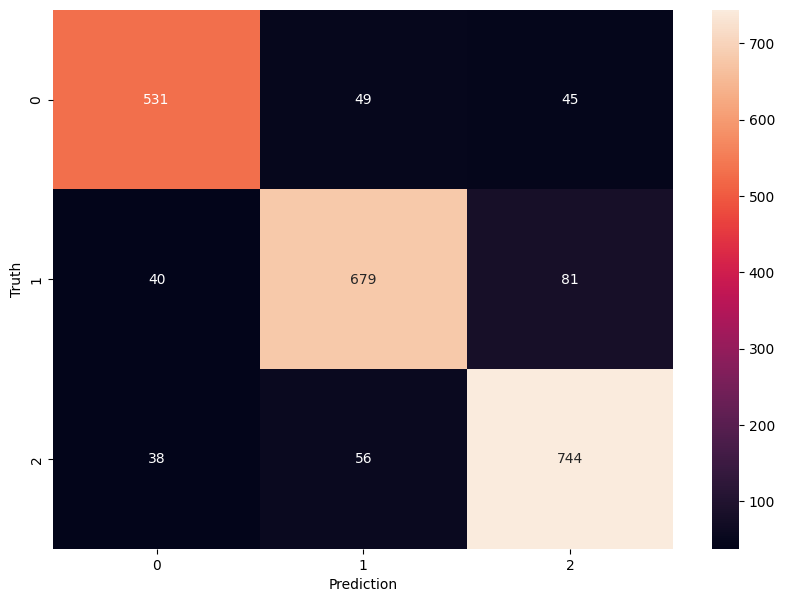

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## [**Solution**](./spacy_word_embeddings_solution.ipynb)